<a href="https://colab.research.google.com/github/aldrick-t/puzzlebot-emdial/blob/dev-final/train/TLRecogni_train_YOLOv8n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -r tl_dataset_mini/
!rm -r tl_dataset_mono_mini/

rm: cannot remove 'tl_dataset_mini/': No such file or directory


In [ ]:
!unzip tl_dataset_mini.zip -d .

Archive:  tl_dataset_mini.zip
   creating: ./tl_dataset_mini/
  inflating: ./__MACOSX/._tl_dataset_mini  
   creating: ./tl_dataset_mini/misc/
  inflating: ./tl_dataset_mini/.DS_Store  
  inflating: ./__MACOSX/tl_dataset_mini/._.DS_Store  
   creating: ./tl_dataset_mini/test/
   creating: ./tl_dataset_mini/train/
  inflating: ./tl_dataset_mini/readme.txt  
  inflating: ./__MACOSX/tl_dataset_mini/._readme.txt  
   creating: ./tl_dataset_mini/none/
   creating: ./tl_dataset_mini/val/
  inflating: ./tl_dataset_mini/misc/.DS_Store  
  inflating: ./__MACOSX/tl_dataset_mini/misc/._.DS_Store  
  inflating: ./tl_dataset_mini/misc/trainlabels_tl_dataset_mini.zip  
  inflating: ./tl_dataset_mini/misc/vallabels_tl_dataset_mini.zip  
  inflating: ./__MACOSX/tl_dataset_mini/misc/._vallabels_tl_dataset_mini.zip  
  inflating: ./tl_dataset_mini/test/tl-none-3_13_emdial.jpg  
  inflating: ./__MACOSX/tl_dataset_mini/test/._tl-none-3_13_emdial.jpg  
  inflating: ./tl_dataset_mini/test/tl-red_749_emdial.

In [ ]:
!unzip tl_dataset_mono_mini.zip -d .

Archive:  tl_dataset_mono_mini.zip
   creating: ./tl_dataset_mono_mini/
   creating: ./tl_dataset_mono_mini/misc/
  inflating: ./tl_dataset_mono_mini/.DS_Store  
  inflating: ./__MACOSX/tl_dataset_mono_mini/._.DS_Store  
   creating: ./tl_dataset_mono_mini/test/
   creating: ./tl_dataset_mono_mini/train/
  inflating: ./tl_dataset_mono_mini/readme.txt  
  inflating: ./__MACOSX/tl_dataset_mono_mini/._readme.txt  
   creating: ./tl_dataset_mono_mini/none/
   creating: ./tl_dataset_mono_mini/val/
  inflating: ./tl_dataset_mono_mini/misc/.DS_Store  
  inflating: ./__MACOSX/tl_dataset_mono_mini/misc/._.DS_Store  
  inflating: ./tl_dataset_mono_mini/misc/trainlabels_tl_dataset_mini.zip  
  inflating: ./tl_dataset_mono_mini/misc/vallabels_tl_dataset_mini.zip  
  inflating: ./__MACOSX/tl_dataset_mono_mini/misc/._vallabels_tl_dataset_mini.zip  
  inflating: ./tl_dataset_mono_mini/test/tl-red-track-mod2-l_34_emdial.jpg  
  inflating: ./__MACOSX/tl_dataset_mono_mini/test/._tl-red-track-mod2-l_34_e

In [ ]:
!rm -r __MACOSX/

In [ ]:
!rm -r runs/

In [ ]:
!pip install ultralytics

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
            

In [ ]:
%%bash
cat > data.yaml << 'EOF'
train: tl_dataset_mono_mini/train
val:   tl_dataset_mono_mini/val
test:  tl_dataset_mono_mini/test

# number of classes
nc: 1

# class names
# names: ['tl_red', 'tl_yellow', 'tl_green']
names: ['tl']
EOF

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8l.yaml')

In [ ]:
model.train(
    data='data.yaml',       # uses your train/val/test dirs
    epochs=150,
    imgsz=(120, 160),       # (height, width)
    batch=32,                # smaller batch to fit T4's 15 GB
    device=0,               # GPU 0 on Colab
    workers=4,              # reduce parallel loaders
    patience=15,             # early stop if no improvement

    # enable default augmentations
    augment=True,

    # (optional) custom augmentation strengths:
     mosaic=1.0,          # enable mosaic
    # mixup=0.5,           # enable mixup
    # hsv_h=0.015,         # hue jitter
    # hsv_s=0.7,           # saturation jitter
    # hsv_v=0.4,           # value jitter
     degrees=5.0,         # ±5° rotation
     translate=0.1,       # ±10% translation
     scale=0.5,           # ±50% scale
    # shear=0.0,
    # perspective=0.0,
     flipud=0.0,          # no vertical flips
     fliplr=0.8,          # 50% horizontal flips
)

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.8, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=(120, 160), int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile

train: Scanning /content/tl_dataset_mono_mini/train/labels... 652 images, 0 backgrounds, 0 corrupt: 100%|██████████| 652/652 [00:00<00:00, 2373.16it/s]

train: New cache created: /content/tl_dataset_mono_mini/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 121.9±73.6 MB/s, size: 7.2 KB)


val: Scanning /content/tl_dataset_mono_mini/val/labels... 113 images, 20 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<00:00, 1061.42it/s]

val: New cache created: /content/tl_dataset_mono_mini/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 160 train, 160 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       2.1G      4.255      17.73      2.835         24        160: 100%|██████████| 21/21 [00:03<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all        114         94          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.21G      5.869      8.323      3.309         16        160: 100%|██████████| 21/21 [00:03<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all        114         94   0.000169     0.0532   0.000108   1.86e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.23G      4.391      3.911      2.182         19        160: 100%|██████████| 21/21 [00:03<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all        114         94          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.31G       4.05      2.927      1.826         18        160: 100%|██████████| 21/21 [00:03<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all        114         94          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.45G      3.705      2.355      1.562         20        160: 100%|██████████| 21/21 [00:03<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all        114         94          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.59G      2.968      1.696      1.388         18        160: 100%|██████████| 21/21 [00:03<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all        114         94     0.0181     0.0319      0.002   0.000548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.74G      2.767       1.54      1.343         23        160: 100%|██████████| 21/21 [00:03<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all        114         94      0.107     0.0532     0.0167    0.00248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.91G      2.407      1.262      1.213         22        160: 100%|██████████| 21/21 [00:03<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]


                   all        114         94      0.167       0.16     0.0533     0.0114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.04G      2.383      1.247      1.161         19        160: 100%|██████████| 21/21 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all        114         94      0.125      0.128     0.0598     0.0121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.19G      2.195      1.111      1.143         26        160: 100%|██████████| 21/21 [00:03<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all        114         94      0.265      0.223      0.131     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.35G      2.192       1.07      1.133         12        160: 100%|██████████| 21/21 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.98it/s]


                   all        114         94      0.278      0.245      0.147     0.0438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.49G      2.052      1.049      1.096         17        160: 100%|██████████| 21/21 [00:03<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all        114         94      0.428      0.319      0.231     0.0689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.64G      1.951     0.9699      1.048         16        160: 100%|██████████| 21/21 [00:03<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all        114         94      0.216      0.181      0.143     0.0522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.81G      1.913     0.9102      1.036         23        160: 100%|██████████| 21/21 [00:03<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all        114         94      0.443      0.245      0.237     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.95G      2.038     0.9782      1.065         27        160: 100%|██████████| 21/21 [00:03<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all        114         94      0.555      0.394      0.407     0.0973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.11G      1.842     0.9012      1.016         18        160: 100%|██████████| 21/21 [00:03<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all        114         94      0.465      0.319      0.239     0.0591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.24G      1.752     0.8785     0.9917         26        160: 100%|██████████| 21/21 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all        114         94      0.358      0.191      0.161     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.39G      1.823     0.8806       1.02         19        160: 100%|██████████| 21/21 [00:03<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all        114         94      0.535      0.362      0.401      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.54G      1.869     0.9152      1.033         21        160: 100%|██████████| 21/21 [00:03<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all        114         94      0.468      0.365      0.356      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.71G      1.759     0.8774      1.008         24        160: 100%|██████████| 21/21 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all        114         94      0.588      0.447      0.446      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.85G      1.743     0.8662      1.009         18        160: 100%|██████████| 21/21 [00:03<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all        114         94       0.17      0.213     0.0852     0.0352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.99G      1.669     0.8211     0.9894         23        160: 100%|██████████| 21/21 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all        114         94      0.488      0.213      0.138     0.0509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.14G      1.669      0.827     0.9787         25        160: 100%|██████████| 21/21 [00:03<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all        114         94       0.42      0.394      0.333      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.29G      1.673     0.8134     0.9927         22        160: 100%|██████████| 21/21 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]


                   all        114         94      0.093      0.128     0.0192    0.00431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.44G      1.697      0.805     0.9936         19        160: 100%|██████████| 21/21 [00:03<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all        114         94      0.487      0.415      0.374      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.61G      1.522     0.7416     0.9533         30        160: 100%|██████████| 21/21 [00:03<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all        114         94      0.583      0.309       0.28     0.0907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.74G      1.569      0.753     0.9477         21        160: 100%|██████████| 21/21 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all        114         94      0.448      0.388      0.307     0.0999



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       5.9G      1.579     0.7759     0.9773         24        160: 100%|██████████| 21/21 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all        114         94      0.314      0.213      0.157     0.0528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.04G      1.538     0.7699     0.9681         16        160: 100%|██████████| 21/21 [00:03<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all        114         94      0.542      0.366      0.365      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       6.2G      1.631     0.7897     0.9663         24        160: 100%|██████████| 21/21 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all        114         94      0.679      0.532      0.507      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.35G      1.572     0.7596     0.9645         18        160: 100%|██████████| 21/21 [00:03<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all        114         94      0.579      0.352       0.39      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.51G      1.531     0.7399      0.951         19        160: 100%|██████████| 21/21 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all        114         94      0.599      0.404      0.328       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.66G      1.543     0.7332     0.9455         23        160: 100%|██████████| 21/21 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]


                   all        114         94      0.623      0.415      0.399      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       6.8G      1.509     0.7277     0.9463         18        160: 100%|██████████| 21/21 [00:03<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]

                   all        114         94       0.68      0.361      0.384      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.95G      1.471     0.7141      0.945         24        160: 100%|██████████| 21/21 [00:03<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all        114         94      0.716      0.482      0.489      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.09G      1.429     0.6992     0.9436         20        160: 100%|██████████| 21/21 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all        114         94      0.542       0.34      0.339      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.26G      1.483      0.719     0.9329         16        160: 100%|██████████| 21/21 [00:03<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all        114         94      0.372       0.34      0.197     0.0796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.39G      1.457     0.7177     0.9326         26        160: 100%|██████████| 21/21 [00:03<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all        114         94      0.602      0.319      0.311      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.91G      1.449     0.6777     0.9307         17        160: 100%|██████████| 21/21 [00:03<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all        114         94      0.598       0.34      0.346      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.02G      1.443     0.6877     0.9355         24        160: 100%|██████████| 21/21 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]


                   all        114         94      0.637      0.383      0.371      0.168

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.02G       1.42     0.6881     0.9329         23        160: 100%|██████████| 21/21 [00:03<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.02it/s]

                   all        114         94       0.63      0.417      0.425      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.02G      1.539     0.7451     0.9347         20        160: 100%|██████████| 21/21 [00:03<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all        114         94       0.48      0.426      0.331      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.08G      1.514      0.716     0.9226         21        160: 100%|██████████| 21/21 [00:02<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all        114         94      0.564      0.468      0.442      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.15G      1.406     0.6622     0.9075         26        160: 100%|██████████| 21/21 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all        114         94      0.463       0.33      0.245      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.24G      1.457      0.677     0.9277         23        160: 100%|██████████| 21/21 [00:03<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all        114         94      0.634      0.394      0.441      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.36G      1.365     0.6511     0.9175         18        160: 100%|██████████| 21/21 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all        114         94      0.547      0.287       0.28      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.51G      1.399     0.6788     0.9148         30        160: 100%|██████████| 21/21 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all        114         94      0.716      0.375      0.447      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.69G      1.381      0.656     0.9167         14        160: 100%|██████████| 21/21 [00:03<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all        114         94      0.716      0.383      0.422      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.81G      1.304     0.6542     0.9107         18        160: 100%|██████████| 21/21 [00:03<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all        114         94      0.465      0.453      0.424      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.98G       1.31     0.6428     0.9073         21        160: 100%|██████████| 21/21 [00:03<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all        114         94      0.716      0.415      0.455      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.11G      1.352      0.657     0.9044         19        160: 100%|██████████| 21/21 [00:03<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all        114         94      0.652      0.394      0.443      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.28G      1.363     0.6579     0.9184         16        160: 100%|██████████| 21/21 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.18it/s]

                   all        114         94      0.477       0.32      0.311      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.42G      1.306      0.627     0.9069         24        160: 100%|██████████| 21/21 [00:03<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all        114         94       0.65       0.33      0.338      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.56G       1.31     0.6132     0.8972         16        160: 100%|██████████| 21/21 [00:03<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]


                   all        114         94       0.43      0.383      0.366      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.72G      1.331      0.631     0.8868         19        160: 100%|██████████| 21/21 [00:03<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all        114         94      0.729      0.315      0.359      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.88G      1.316     0.6257     0.9151         27        160: 100%|██████████| 21/21 [00:03<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all        114         94      0.693       0.34      0.399      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.03G      1.351     0.6244      0.909         13        160: 100%|██████████| 21/21 [00:03<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all        114         94       0.51      0.309      0.339       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.17G      1.336     0.6265     0.9171         16        160: 100%|██████████| 21/21 [00:03<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all        114         94      0.635      0.404      0.455      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.32G      1.283     0.6029     0.9039         24        160: 100%|██████████| 21/21 [00:03<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all        114         94      0.581      0.383      0.362      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.46G      1.267     0.6257     0.9119         23        160: 100%|██████████| 21/21 [00:03<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all        114         94      0.645      0.489      0.507      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.63G      1.265     0.6079     0.9016         21        160: 100%|██████████| 21/21 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all        114         94       0.48       0.33      0.335      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.78G      1.296     0.6083     0.8965         20        160: 100%|██████████| 21/21 [00:03<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all        114         94      0.636      0.436      0.436      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.92G      1.231     0.5972     0.8948         21        160: 100%|██████████| 21/21 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all        114         94      0.642      0.447      0.466      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.06G      1.233     0.5985     0.8914         26        160: 100%|██████████| 21/21 [00:03<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]


                   all        114         94      0.594      0.415      0.416      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.21G      1.266      0.585     0.8915         26        160: 100%|██████████| 21/21 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.09it/s]

                   all        114         94      0.738      0.436      0.457      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.38G      1.286     0.5973     0.8948         21        160: 100%|██████████| 21/21 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]


                   all        114         94      0.388      0.245      0.214      0.092

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.51G      1.274     0.5911      0.902         24        160: 100%|██████████| 21/21 [00:03<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.22it/s]

                   all        114         94      0.513      0.394      0.392       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.67G      1.275     0.6003      0.892         18        160: 100%|██████████| 21/21 [00:03<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.14it/s]

                   all        114         94      0.628      0.319      0.336      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.83G      1.272     0.5861     0.9014         19        160: 100%|██████████| 21/21 [00:03<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all        114         94      0.721      0.457      0.512      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.96G      1.243     0.5843     0.8994         25        160: 100%|██████████| 21/21 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]


                   all        114         94      0.772      0.479      0.527      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.11G      1.242     0.5854     0.8969         13        160: 100%|██████████| 21/21 [00:03<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all        114         94      0.469      0.415      0.344       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.28G      1.246     0.5678     0.8882         20        160: 100%|██████████| 21/21 [00:03<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]

                   all        114         94      0.718       0.34      0.418      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.41G      1.273     0.5872     0.8961         28        160: 100%|██████████| 21/21 [00:03<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all        114         94      0.758      0.489      0.529      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.56G      1.259     0.5635      0.888         19        160: 100%|██████████| 21/21 [00:03<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all        114         94      0.752      0.468      0.491       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.72G      1.256     0.5626     0.8974         16        160: 100%|██████████| 21/21 [00:03<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all        114         94      0.825      0.457       0.52      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.88G      1.199     0.5691     0.8809         27        160: 100%|██████████| 21/21 [00:03<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.07it/s]

                   all        114         94      0.717      0.426      0.451      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.01G      1.237     0.5638      0.879         15        160: 100%|██████████| 21/21 [00:03<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

                   all        114         94      0.675      0.457      0.467      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.18G      1.219     0.5781     0.8909         18        160: 100%|██████████| 21/21 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all        114         94      0.673      0.436      0.501       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.31G      1.195     0.5642     0.8764         19        160: 100%|██████████| 21/21 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all        114         94      0.609      0.394      0.384      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.48G      1.168     0.5591     0.8711         22        160: 100%|██████████| 21/21 [00:03<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all        114         94      0.556      0.351       0.35      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.85G      1.209     0.5543     0.8883         18        160: 100%|██████████| 21/21 [00:03<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all        114         94      0.561      0.383      0.395      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.95G      1.198     0.5625     0.8749         24        160: 100%|██████████| 21/21 [00:03<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all        114         94      0.509      0.396      0.385      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.95G      1.194     0.5402      0.884         21        160: 100%|██████████| 21/21 [00:03<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all        114         94      0.583      0.383      0.398      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         2G      1.157      0.545     0.8832         23        160: 100%|██████████| 21/21 [00:03<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all        114         94      0.666      0.362      0.427      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.08G      1.146     0.5448     0.8737         15        160: 100%|██████████| 21/21 [00:03<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all        114         94      0.693      0.394      0.476      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.15G      1.142     0.5334       0.88         30        160: 100%|██████████| 21/21 [00:03<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all        114         94      0.717      0.436      0.457      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.24G      1.161     0.5291     0.8832         20        160: 100%|██████████| 21/21 [00:03<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]

                   all        114         94      0.699      0.404      0.445      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.36G      1.179     0.5456     0.8802         24        160: 100%|██████████| 21/21 [00:03<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.79it/s]

                   all        114         94      0.742      0.351      0.442      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.52G      1.205     0.5548       0.88         16        160: 100%|██████████| 21/21 [00:03<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]

                   all        114         94      0.657      0.277      0.358      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.66G      1.171     0.5499     0.8683         24        160: 100%|██████████| 21/21 [00:03<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all        114         94      0.654      0.394      0.464      0.199
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 70, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



90 epochs completed in 0.115 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]


                   all        114         94        0.7      0.489      0.515      0.216
Speed: 0.0ms preprocess, 3.4ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb8e34d28d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


WARNING ⚠️ imgsz=[120, 160] must be multiple of max stride 32, updating to [128, 160]
0: 128x160 1 tl, 35.6ms
Speed: 0.7ms preprocess, 35.6ms inference, 1.5ms postprocess per image at shape (1, 3, 128, 160)


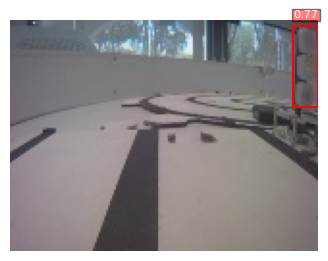

In [ ]:
import random, matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# pick one test image
test_files = [f for f in os.listdir('tl_dataset_mono_mini/test') if f.endswith('.jpg')]
f = random.choice(test_files)
img = Image.open(f'tl_dataset_mono_mini/test/{f}').convert('RGB')

# run prediction
results = model.predict(
    source=img,
    imgsz=(120,160),
    conf=0.25,
    device=0
)[0]

# plot
fig, ax = plt.subplots(1, figsize=(4,3))
ax.imshow(img.resize((160,120)))
for *box, conf, cls in results.boxes.data.cpu().numpy():
    x1,y1,x2,y2 = box
    rect = patches.Rectangle((x1,y1), x2-x1, y2-y1,
                             linewidth=1.5, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x1, y1-4, f"{conf:.2f}", color='white',
            bbox=dict(facecolor='red', alpha=0.5, pad=1), fontsize=8)
ax.axis('off')
plt.show()